# 回帰

自動的に入力と出力データの関係性を求めましょう

## 直観に分かる例

数学関数を使い、データを生成

In [1]:
import math
import numpy as np

# 数値を作る関数
def gen_function(x):
    y = math.sin(x)
    return y

# 信号を生成
def generate_signal():
    
    # x と yの出力
    data_x = []
    data_y = []
       
    # x軸のサンプリング
    for x in np.arange(-6, 6, 0.05):
        
        y = gen_function(x)
        
        data_y.append(y)
        data_x.append(x)
        
    return  np.array(data_x), np.array(data_y)

In [2]:
data_x, data_y = generate_signal()

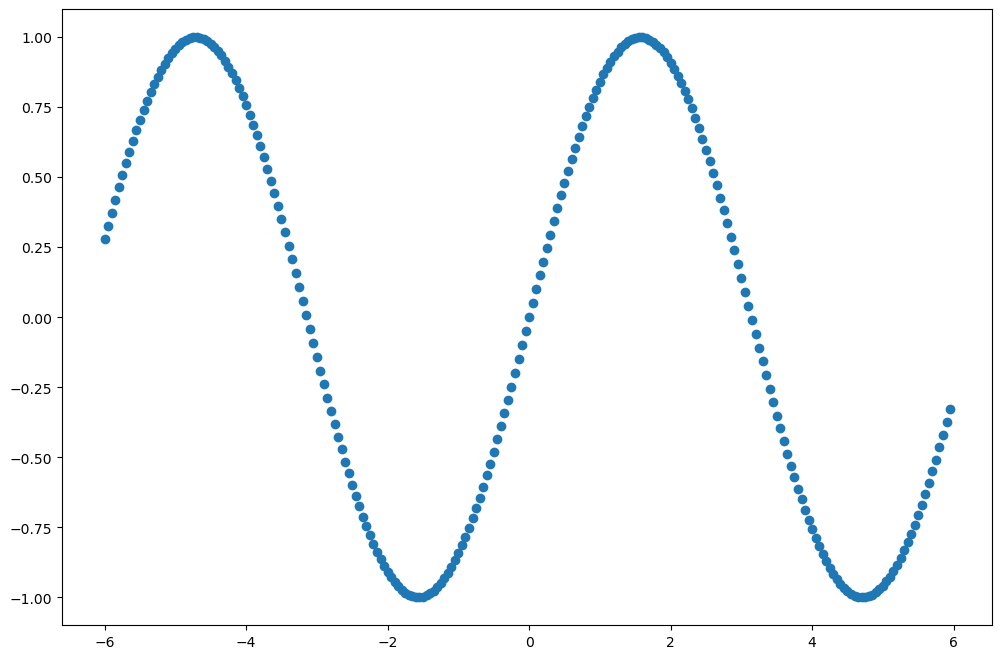

In [3]:
import matplotlib.pyplot as plt

# 可視化
plt.figure(figsize=(12,8))
plt.scatter(data_x, data_y)

### ノイズ追加
大変きれいなsin関数ですが、実際に信号はそんなにきれいではないので、少しノイズを加えてみましょう

In [4]:
# 数値を作る関数
def gen_function(x):
    y = math.sin(x)
    y += np.random.normal(-0.2, 0.2)  # 少しノイズを加える
    return y

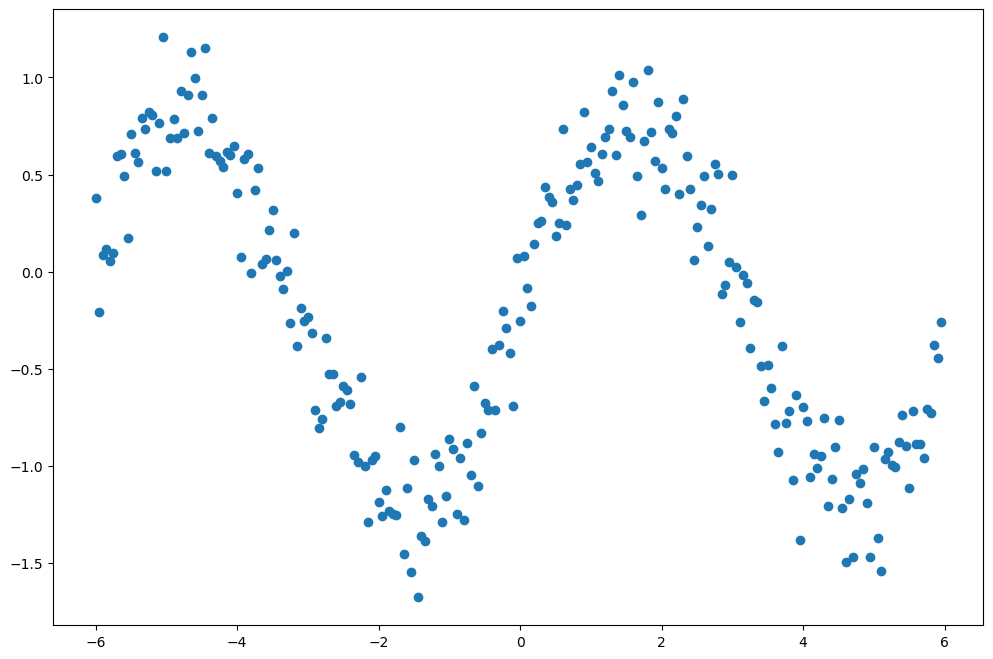

In [5]:
data_x, data_y = generate_signal()

# 可視化
plt.figure(figsize=(12,8))
plt.scatter(data_x, data_y)

### データ損失
たまに、うまくデータ取れない場合もあるので、さらに、信号から一部のデータを抜けてみましょう

In [6]:
# 信号を生成
def generate_signal(skip=(-6, -6)):
    
    # x と yの出力
    data_x = []
    data_y = []
       
    # x軸のサンプリング
    for x in np.arange(-6, 6, 0.05):
    
        # ランダムにデータが失う
        if x > skip[0] and x < skip[1]:
            continue
        
        y = gen_function(x)
        
        data_y.append(y)
        data_x.append(x)
        
    return  np.array(data_x), np.array(data_y)

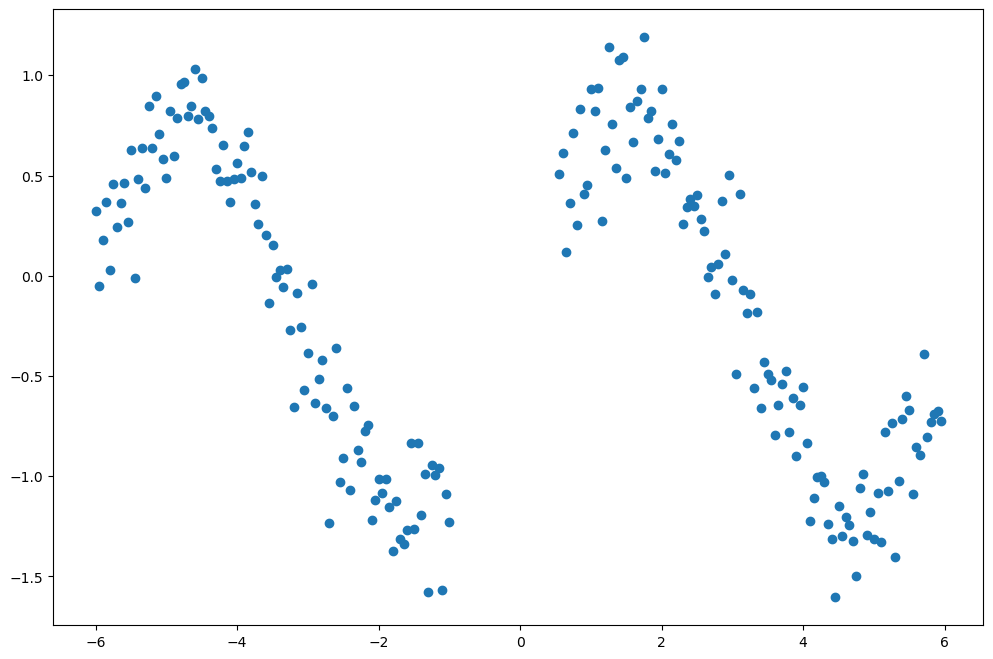

In [7]:
data_x, data_y = generate_signal((-1.0, 0.5))

# 可視化
plt.figure(figsize=(12,8))
plt.scatter(data_x, data_y)

これで、回帰できるのか確認してみましょう

## モデル構築

In [8]:
from keras.layers import Input, Dense
from keras.models import Model

def create_model():
    
    lyr_input = Input(shape=(1,))
    lyr_hiddn = Dense(units=8, activation="tanh")(lyr_input)
    lyr_hiddn = Dense(units=16, activation="tanh")(lyr_hiddn)
    lyr_hiddn = Dense(units=8, activation="tanh")(lyr_hiddn)
    lyr_outpt = Dense(units=1, activation="tanh")(lyr_hiddn)
    
    model = Model(inputs=lyr_input, outputs=lyr_outpt)
    return model

model = create_model()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 dense (Dense)               (None, 8)                 16        
                                                                 
 dense_1 (Dense)             (None, 16)                144       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 305
Trainable params: 305
Non-trainable params: 0
_________________________________________________________________


In [9]:
#回帰の場合は誤差を減らしたいため、mseはOK
model.compile(optimizer="adam", loss="mse")

## 前処理と学習

In [10]:
# 前処理として、最大値と最小値の間に正規化だけです
min_y = min(data_y)
max_y = max(data_y)
prep_y = (data_y - min_y) / (max_y - min_y)

In [11]:
model.fit(data_x, prep_y, batch_size=100, epochs=1000)

Epoch 1/1000
3/3 [==============================] - 0s 6ms/step - loss: 0.8386
Epoch 2/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.7476
Epoch 3/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.6503
Epoch 4/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.5475
Epoch 5/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.4462
Epoch 6/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.3588
Epoch 7/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.2841
Epoch 8/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.2312
Epoch 9/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.1989
Epoch 10/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.1822
Epoch 11/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.1730
Epoch 12/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.1647
Epoch 13/1000
3/3 [==============================

In [12]:
#データ抜けなしで推論
full_x, _ = generate_signal()
pred_y = model.predict(full_x)

8/8 [==============================] - 0s 2ms/step


In [13]:
# 正規化した数値を元に戻す（後処理）
pred_y = (pred_y * (max_y - min_y)) + min_y

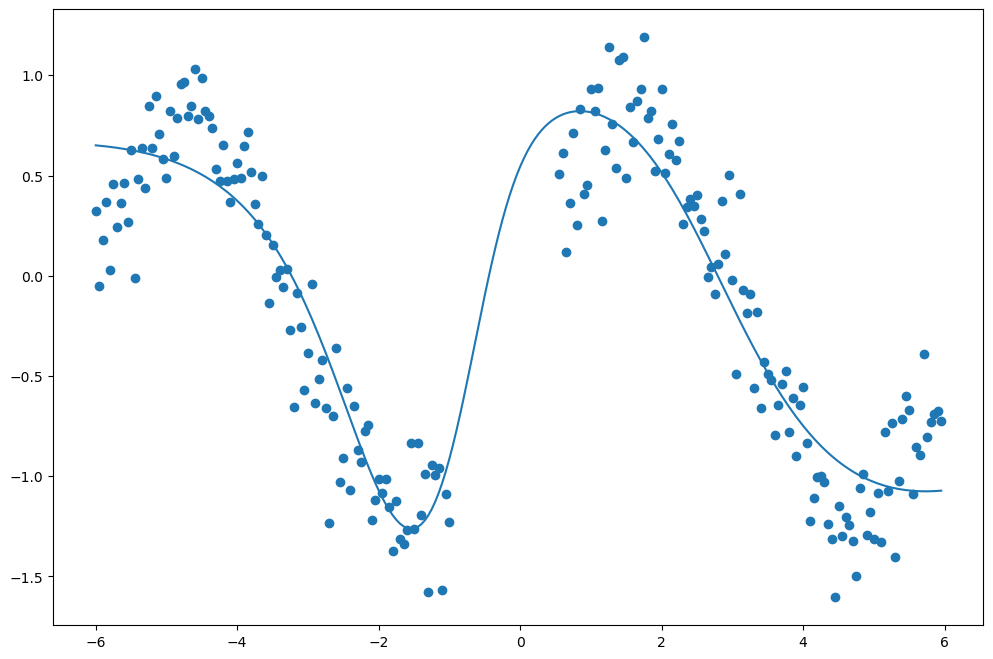

In [14]:
#可視化
plt.figure(figsize=(12,8))
plt.scatter(data_x, data_y)
plt.plot(full_x, pred_y)

## 他の関数はどう？

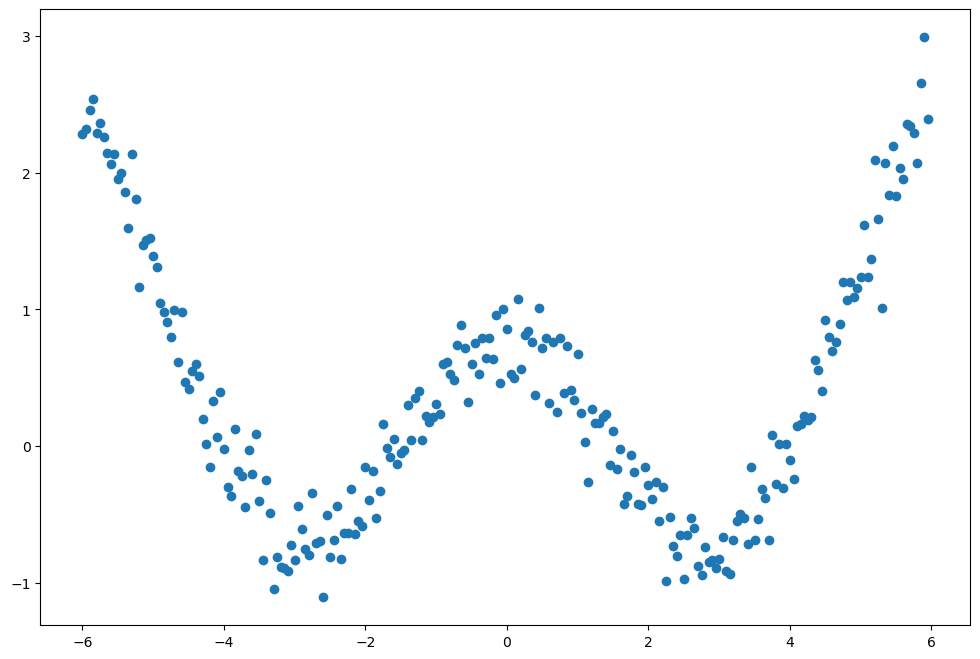

In [15]:
# 数値を作る関数
def gen_function(x):
    y = math.cos(x) + 0.05 * (x * x)
    y += np.random.normal(-0.2, 0.2)  # 少しノイズを加える
    return y

data_x, data_y = generate_signal()

# 可視化
plt.figure(figsize=(12,8))
plt.scatter(data_x, data_y)

In [16]:
model = create_model()
model.compile(optimizer="adam", loss="mse")

In [17]:
# y軸を「最大値」と「最小値」の間に正規化
min_y = min(data_y)
max_y = max(data_y)
prep_y = (data_y - min_y) / (max_y - min_y)

model.fit(data_x, prep_y, batch_size=100, epochs=1000)

Epoch 1/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.4407
Epoch 2/1000
3/3 [==============================] - 0s 4ms/step - loss: 0.3436
Epoch 3/1000
3/3 [==============================] - 0s 4ms/step - loss: 0.2545
Epoch 4/1000
3/3 [==============================] - 0s 4ms/step - loss: 0.1854
Epoch 5/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.1303
Epoch 6/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.1032
Epoch 7/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0937
Epoch 8/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0926
Epoch 9/1000
3/3 [==============================] - 0s 4ms/step - loss: 0.0905
Epoch 10/1000
3/3 [==============================] - 0s 4ms/step - loss: 0.0842
Epoch 11/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0762
Epoch 12/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0667
Epoch 13/1000
3/3 [==============================

8/8 [==============================] - 0s 3ms/step


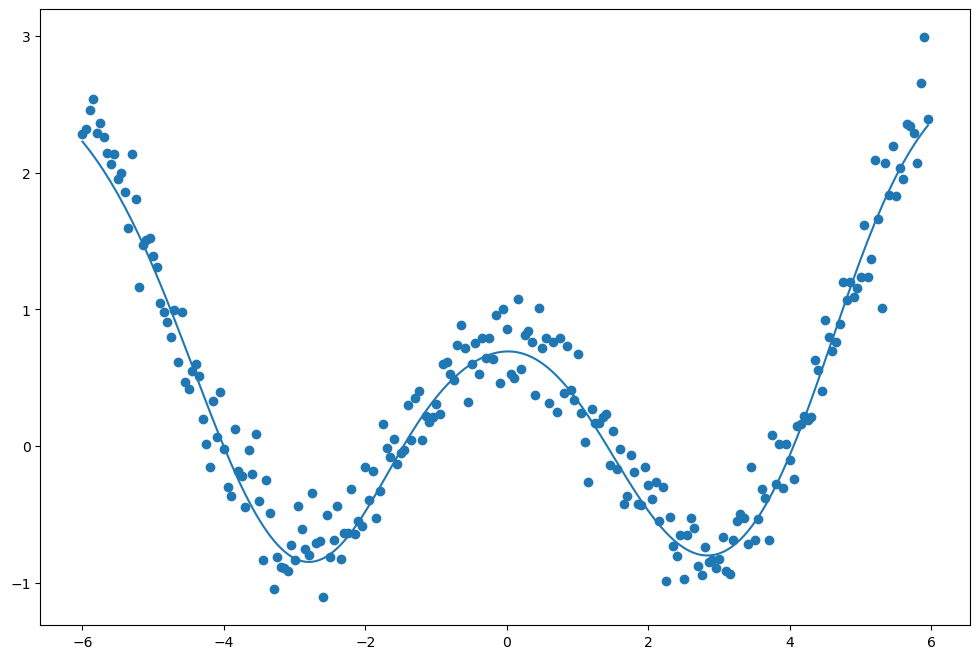

In [18]:
#推論
pred_y = model.predict(data_x)

# 正規化した数値を元に戻す
pred_y = (pred_y * (max_y - min_y)) + min_y

#可視化
plt.figure(figsize=(12,8))
plt.scatter(data_x, data_y)
plt.plot(data_x, pred_y)

### 一部を抜けると？

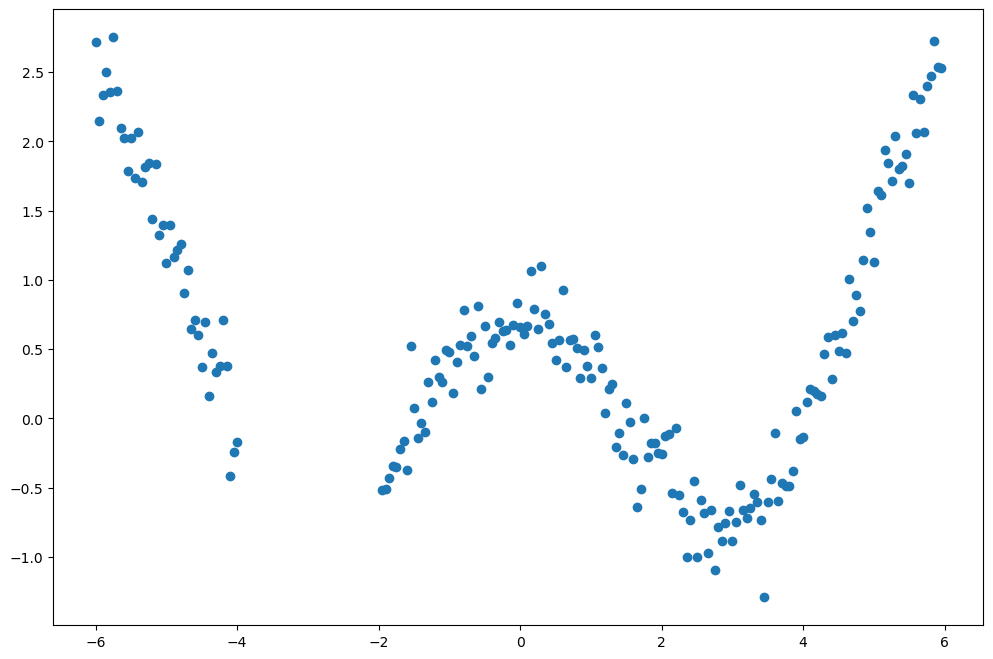

In [19]:
data_x, data_y = generate_signal((-4, -2))

# 可視化
plt.figure(figsize=(12,8))
plt.scatter(data_x, data_y)

In [20]:
model = create_model()
model.compile(optimizer="adam", loss="mse")

In [21]:
# y軸を「最大値」と「最小値」の間に正規化
min_y = min(data_y)
max_y = max(data_y)
prep_y = (data_y - min_y) / (max_y - min_y)

model.fit(data_x, prep_y, batch_size=100, epochs=1000)

Epoch 1/1000
2/2 [==============================] - 1s 3ms/step - loss: 0.3924
Epoch 2/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.3315
Epoch 3/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.2799
Epoch 4/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.2382
Epoch 5/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.2087
Epoch 6/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.1922
Epoch 7/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.1797
Epoch 8/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.1723
Epoch 9/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.1649
Epoch 10/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.1561
Epoch 11/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.1460
Epoch 12/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.1353
Epoch 13/1000
2/2 [==============================

8/8 [==============================] - 0s 3ms/step


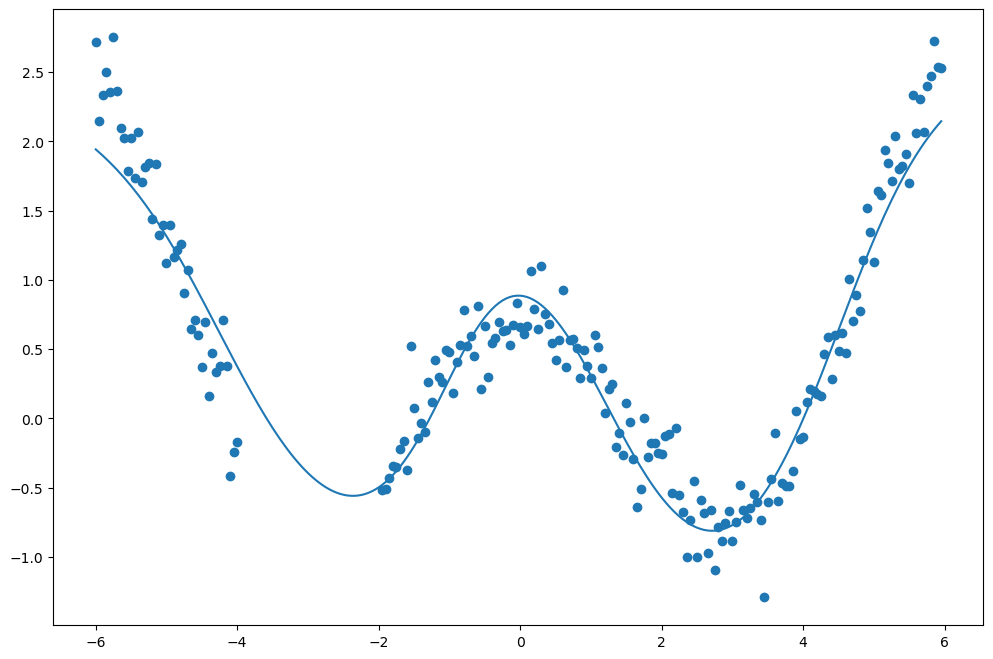

In [22]:
#データ抜けなしで推論
full_x, _ = generate_signal()
pred_y = model.predict(full_x)

# 正規化した数値を元に戻す
pred_y = (pred_y * (max_y - min_y)) + min_y

#可視化
plt.figure(figsize=(12,8))
plt.scatter(data_x, data_y)
plt.plot(full_x, pred_y)